# Predictive Analytics - Prediksi penyakit Stroke

Proyek ini didasarkan dari kesadaran tentang kesehatan sekitar dimana tingginya tingkat penderita penyakit stroke di Indonesia. Proyek ini berfokus pada prediksi potensi stroke menggunakan dataset yang mencakup berbagai faktor demografis dan kesehatan seperti usia, jenis kelamin, hipertensi, penyakit jantung, tingkat glukosa, BMI, status pernikahan, jenis pekerjaan, tempat tinggal, dan kebiasaan merokok. Tujuannya adalah untuk mengeksplorasi hubungan antara faktor-faktor ini dengan kemugkinan stroke, serta membangun model prediksi yang dapat mengidentifikasi individu dengan risiko stroke tinggi. Dengan menggunakan teknik analisis data dan machine learning, proyek ini diharapkan dapat membantu dalam upaya pencegahan stroke melalui deteksi dini berdasarkan faktor risiko yang ada.

## Import Library yang dibutuhkan


In [1]:
# Library untuk pemrosesan data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Library untuk pelatihan model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

# Library untuk evaluasi model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Data Understanding

Proses ini merupakan proses untuk memahami data yang diperlukan dalam pembuatan model sehingga data dapat dibersihkan, diubah, dan dieksplor sedemekian rupa untuk mengidentifikasi pola dan temuan pada data.

In [2]:
df = pd.read_csv('dataset\healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.shape

(5110, 12)

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### EDA (Exploratory Data Analysis)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


dari penjabaran mengenai info data diatas diketahui bahwa : 
1. Kolom id tidak diperlukan dalam analisis maupun pembuatan model sehingga dapat dihapus
2. Terdapat missing data pada kolom BMI

In [6]:
df = df.drop(columns=['id'])

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


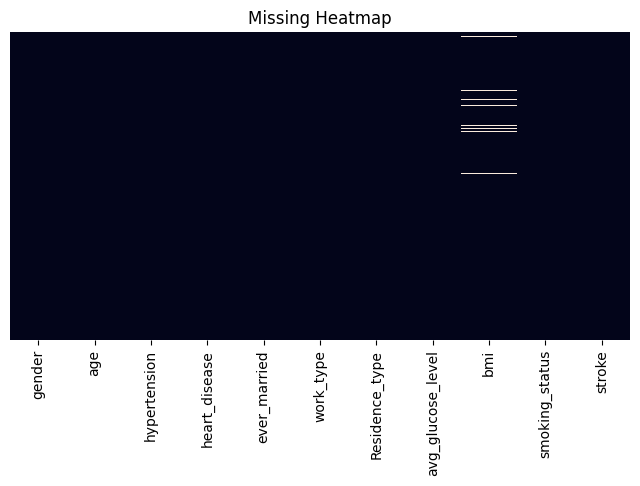

In [7]:
print(df.isnull().sum())

plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Heatmap')
plt.show()

In [8]:
persentase_null_bmi = (df['bmi'].isnull().sum()/len(df))*100
print("Presentase data null pada BMI : ",persentase_null_bmi)

Presentase data null pada BMI :  3.9334637964774952


missing value pada kolom BMI hanya mencakup 4% dari keseluruhan data, sehingga data tersebut masih dalam kategori aman untuk dihapus

In [9]:
df.dropna(axis=0, inplace=True)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


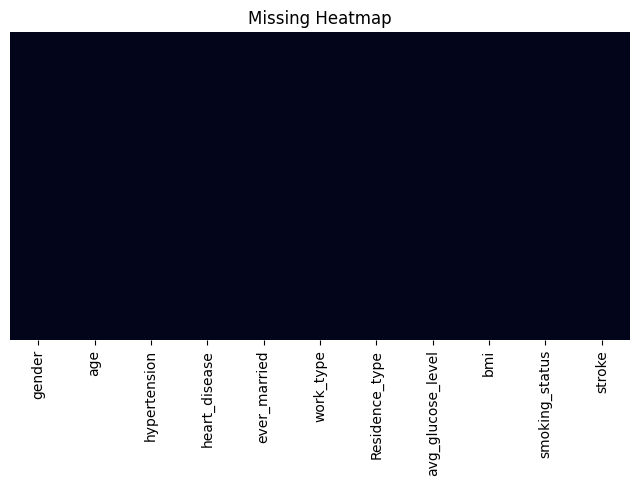

In [10]:
print(df.isnull().sum())
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Heatmap')
plt.show()

In [11]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: xlabel='gender', ylabel='count'>

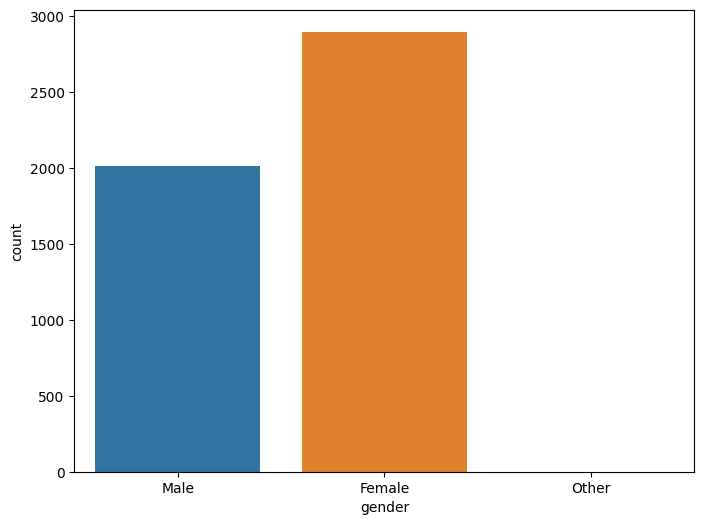

In [12]:
plt.figure(figsize=(8,6))

sns.countplot(x=df['gender'])

In [13]:
df['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [14]:
df[df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


Dari grafik serta tabel diatas, dapat dilihat bahwa gender dengan tipe "other" hanya memiliki 1 data sehingga data tersebut dapat dihilangkan

In [15]:
df = df[df['gender'] != 'Other']

In [57]:
df['stroke'].value_counts()

stroke
0    4699
1     209
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


<Axes: xlabel='age', ylabel='Count'>

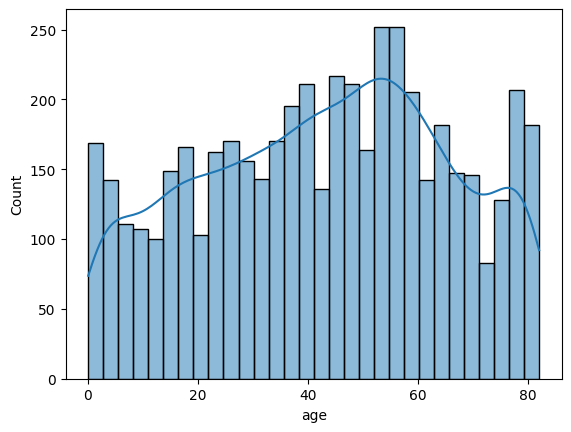

In [17]:
sns.histplot(x='age', bins=30, data=df, kde=True)

dari grafik diatas dapat dilihat bahwa disini data pada kolom age, distribusi cenderung bersifat left-skewed karena sebagian populasi data berada di bagian kanan. Sehingga nilai median data age akan lebih besar daripada nilai mean. 

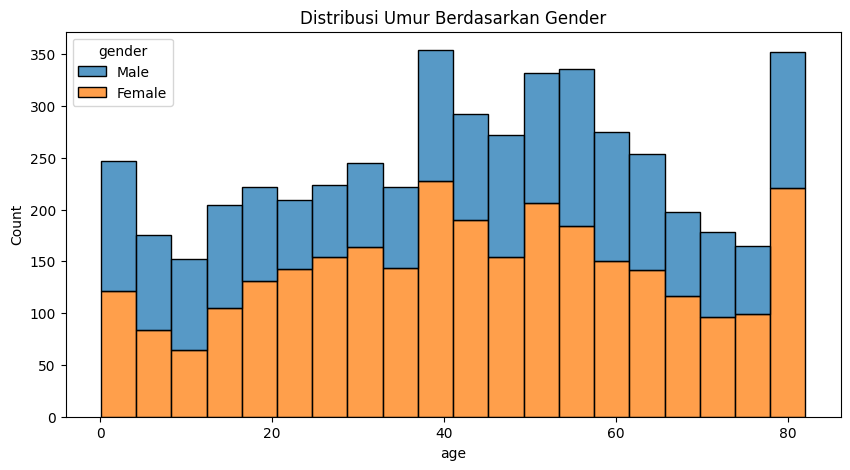

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x='age', hue='gender', multiple='stack')
plt.title('Distribusi Umur Berdasarkan Gender')
plt.show()

dari grafik diatas dapat dilihat bahwa dalam beberapa kelompok umur, gender yang paling banyak terdapat pada data ini adalah female(perempuan) dibandingkan daripada laki-laki

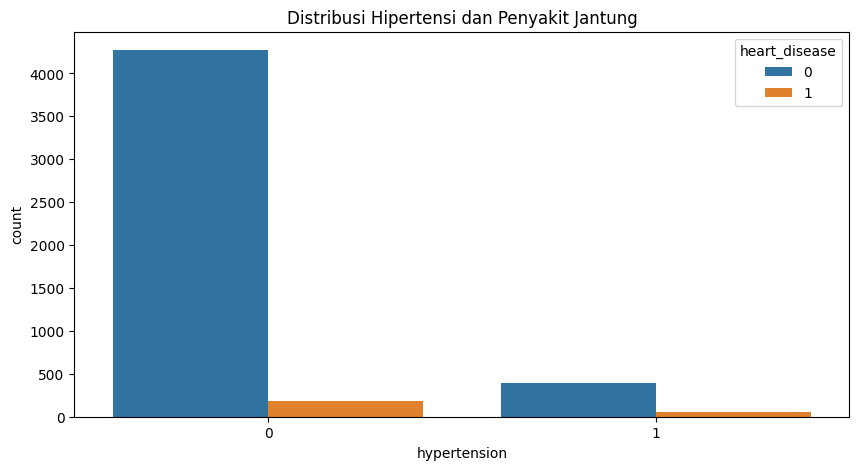

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='hypertension', hue='heart_disease')
plt.title('Distribusi Hipertensi dan Penyakit Jantung')
plt.show()

grafik diatas menunjukkan bahwa data yang didapatkan dalam distribusi hubungan hipertensi dan penyakit jantung terlihat bahwa orang yang yang tidak memiliki hipertensi dan penyakit jantung lebih besar dan orang yang mempunyai penyakit jantung dan juga hipertensi masih tergolong sedikit. Grafik ini menginformasikkan bahwa hubungan antara hipertensi dan penyakit jantung tidak signifikan.

Text(0.5, 1.0, 'Perbandingan tipe pekerjaan dan resiko penyakit stroke')

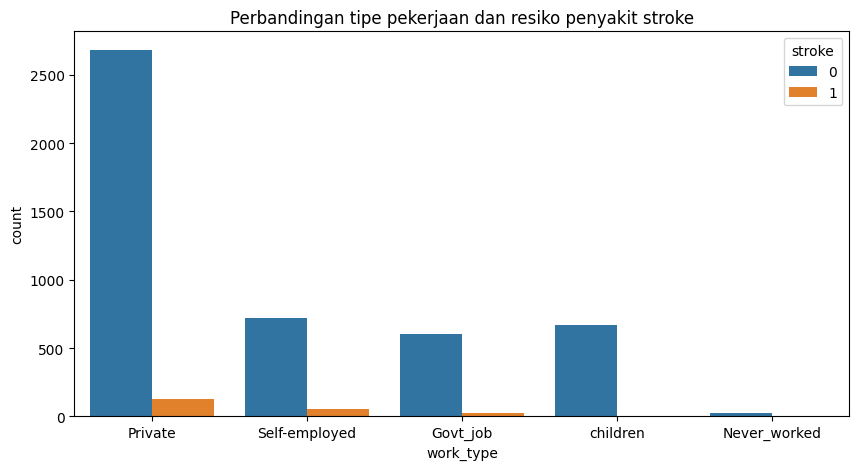

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x='work_type', hue='stroke', )
plt.title("Perbandingan tipe pekerjaan dan resiko penyakit stroke")

dalam grafik dapat dilihat bahwa populasi data menunjukkan bahwa kebanyakan dari data yang dikumpulkan, jenis pekerjaan privat atau swasta tidak memiliki resiko penyakit stroke, namun selain itu dalam pekerjaan swasta juga orang memiliki resiko tertinggi. Hal ini menunjukkan bahwa jenis pekerjaan tidak mempengaruhi potensi resiko stroke.

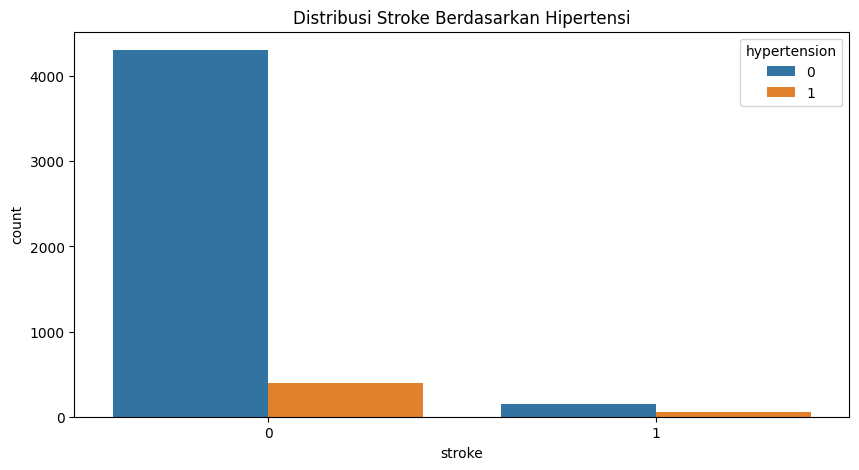

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='stroke', hue='hypertension')
plt.title('Distribusi Stroke Berdasarkan Hipertensi')
plt.show()

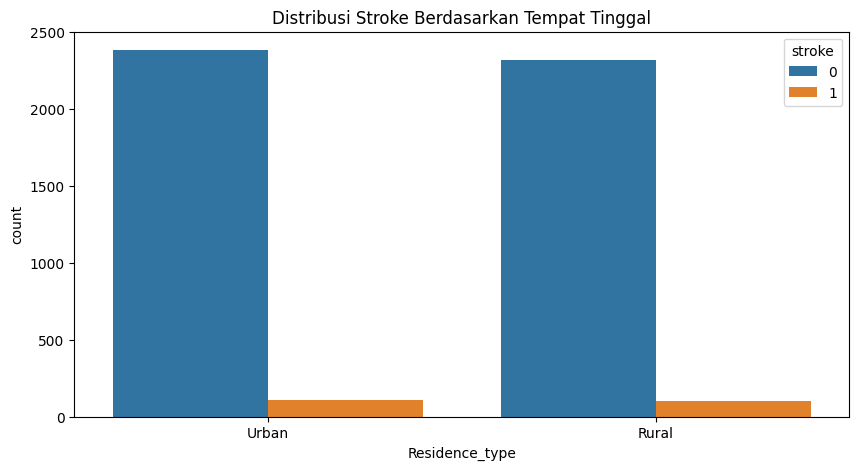

In [22]:
# Pengaruh Tempat Tinggal terhadap Stroke
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Residence_type', hue='stroke')
plt.title('Distribusi Stroke Berdasarkan Tempat Tinggal')
plt.show()

grafik diatas menunjukkan bahwa tempat tinggal urban(kota) maupun rural(pedesaan) tidak memiliki distribusi yang cenderung sama dalam kemungkinan terjadinya stroke, hal ini menunjukkan bahwa tempat tinggal tidak terlalu mempengaruhi jumlah kejadian stroke secara signifikan, karena jumlah kasus stroke relatif kecil di kedua tempat tinggal tersebut.

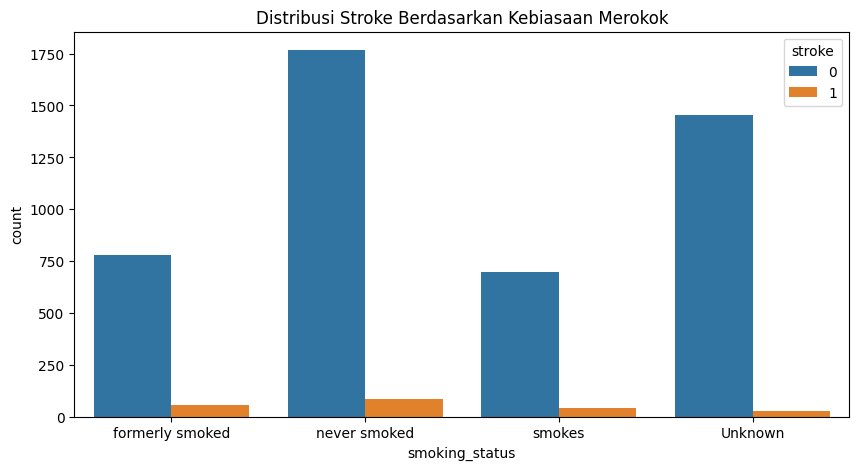

In [23]:
# Pengaruh Status Merokok terhadap Stroke
plt.figure(figsize=(10, 5))
sns.countplot(df, x='smoking_status', hue='stroke')
plt.title('Distribusi Stroke Berdasarkan Kebiasaan Merokok')
plt.show()

Dari grafik ini, dapat disimpulkan bahwa kejadian stroke tidak terkait dengan status merokok, tetapi juga terdapat pada kategori yang tidak diketahui status merokoknya. Namun, tampaknya proporsi kejadian stroke sedikit lebih tinggi pada kelompok yang pernah merokok dibandingkan dengan kelompok yang tidak pernah merokok.

## Data Preparation

Pada tahap ini data yang sudah melalui proses data understanding kemudian akan dipersiapkan untuk masuk ke dalam tahap modeling. Tahap ini mencakup : 
1. Melakukan encoding pada data kategori
2. Membagi data menjadi 2 bagian yaitu train dan juga test dengan menggunakan library train_test_split dengan ratio pembagian 80:20
3. Melakukan standarisasi

In [24]:
print(df['gender'].unique())
print(df['gender'].value_counts())

['Male' 'Female']
gender
Female    2897
Male      2011
Name: count, dtype: int64


In [25]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [26]:
print(df['ever_married'].unique())
print(df['ever_married'].value_counts())

['Yes' 'No']
ever_married
Yes    3204
No     1704
Name: count, dtype: int64


In [27]:
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])

In [28]:
print(df['Residence_type'].unique())
print(df['Residence_type'].value_counts())


['Urban' 'Rural']
Residence_type
Urban    2490
Rural    2418
Name: count, dtype: int64


In [29]:
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])

In [30]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [31]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [32]:
encoder = OneHotEncoder(dtype=int)

df = pd.concat([df, pd.get_dummies(df['work_type'], prefix='work_type', dtype=int)], axis=1)
df = pd.concat([df, pd.get_dummies(df['smoking_status'], prefix='smoking_status', dtype=int)], axis=1)

df.drop(['work_type', 'smoking_status'], axis=1, inplace=True)

df


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,0,103.08,18.6,0,0,0,0,0,1,1,0,0,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4908 non-null   int32  
 1   age                             4908 non-null   float64
 2   hypertension                    4908 non-null   int64  
 3   heart_disease                   4908 non-null   int64  
 4   ever_married                    4908 non-null   int32  
 5   Residence_type                  4908 non-null   int32  
 6   avg_glucose_level               4908 non-null   float64
 7   bmi                             4908 non-null   float64
 8   stroke                          4908 non-null   int64  
 9   work_type_Govt_job              4908 non-null   int32  
 10  work_type_Never_worked          4908 non-null   int32  
 11  work_type_Private               4908 non-null   int32  
 12  work_type_Self-employed         4908 no

In [34]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000
mean,0.409739,42.868810,0.091891,0.049511,0.652812,0.507335,105.297402,28.89456,0.042584,0.128362,0.004482,0.572535,0.157905,0.136716,0.302160,0.170334,0.377343,0.150163
std,0.491836,22.556128,0.288901,0.216954,0.476125,0.499997,44.425550,7.85432,0.201937,0.334526,0.066808,0.494761,0.364689,0.343582,0.459241,0.375964,0.484771,0.357268
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.30000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.067500,23.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,1.000000,91.680000,28.10000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,1.000000,113.495000,33.10000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.60000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

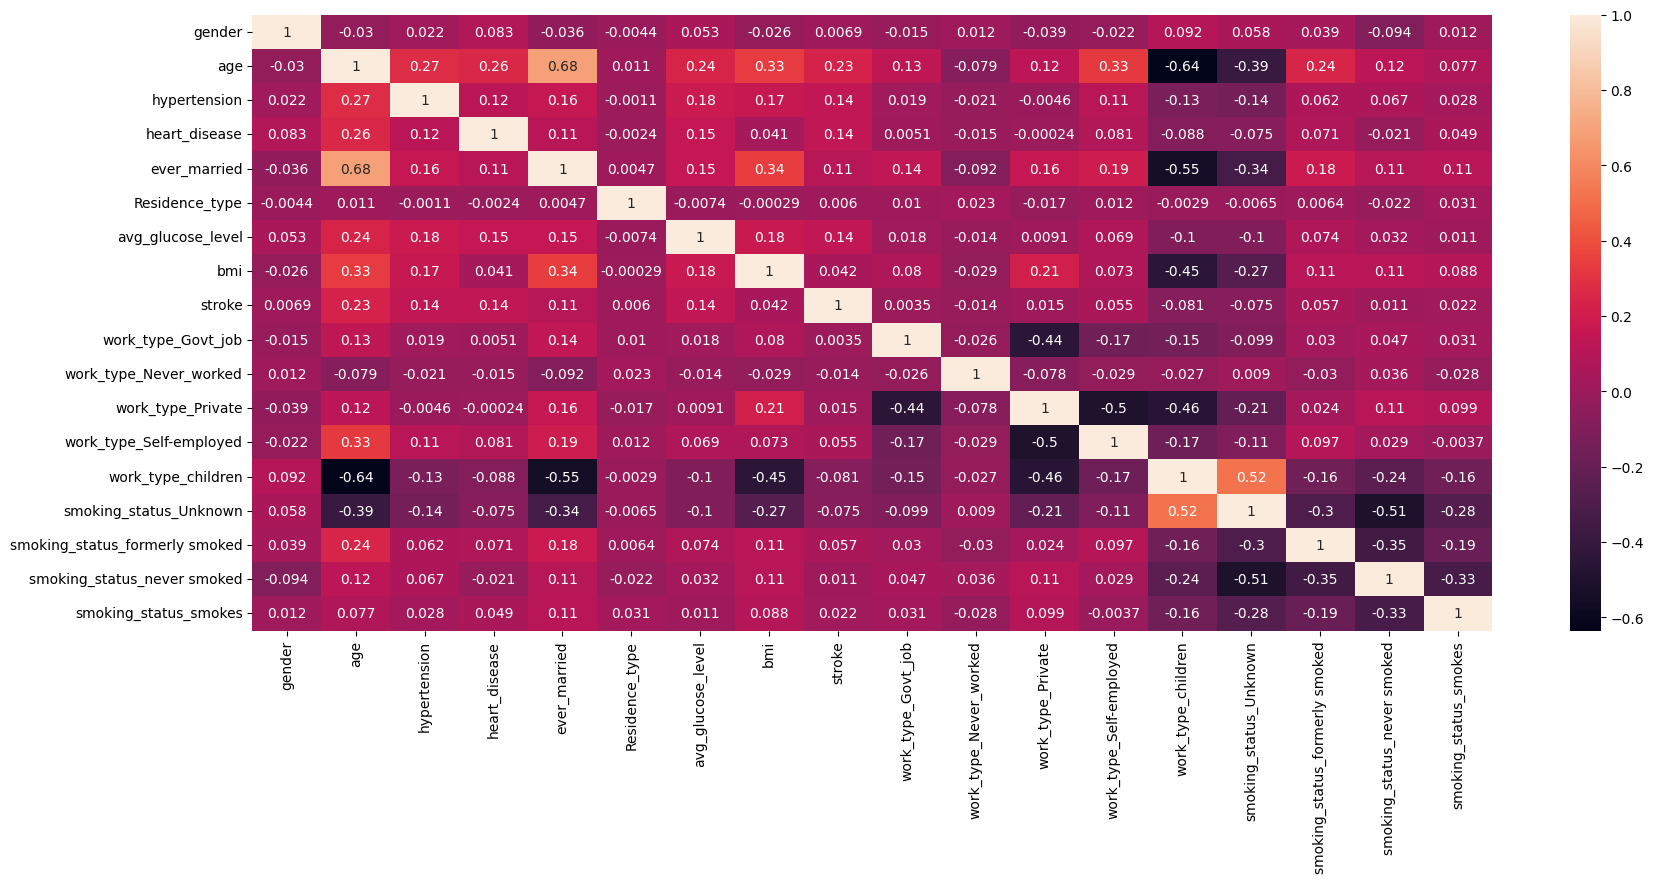

In [35]:
col_corr = df.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(col_corr, annot=True)

In [36]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)

In [37]:
print('Panjang data train : ', len(X_train))
print('Panjang data test : ', len(X_test))

Panjang data train :  3926
Panjang data test :  982


In [38]:
X_train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2988,1,44.0,0,0,1,0,60.32,25.0,0,0,1,0,0,0,0,1,0
1752,0,76.0,1,1,1,0,102.08,31.0,0,0,1,0,0,0,0,0,1
3477,1,14.0,0,0,0,1,74.54,25.2,0,0,0,0,1,1,0,0,0
2527,1,78.0,0,1,1,1,145.03,26.8,0,0,1,0,0,0,1,0,0
137,0,76.0,0,0,1,1,207.28,34.9,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,1,82.0,0,0,1,1,111.81,19.8,0,0,0,1,0,0,1,0,0
1356,0,30.0,0,0,1,0,62.25,33.7,1,0,0,0,0,0,0,1,0
3886,0,45.0,0,0,1,1,91.04,21.1,0,0,1,0,0,0,0,1,0
3485,1,39.0,1,0,1,1,71.66,28.7,0,0,0,1,0,0,0,1,0


In [39]:
numerical_col = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()
scaler.fit(X_train[numerical_col])
X_train[numerical_col] = scaler.transform(X_train.loc[:, numerical_col])
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2988,1,0.049143,0,0,1,0,-1.019159,-0.507993,0,0,1,0,0,0,0,1,0
1752,0,1.468481,1,1,1,0,-0.073129,0.263572,0,0,1,0,0,0,0,0,1
3477,1,-1.281487,0,0,0,1,-0.697019,-0.482274,0,0,0,0,1,1,0,0,0
2527,1,1.557190,0,1,1,1,0.899859,-0.276524,0,0,1,0,0,0,1,0,0
137,0,1.468481,0,0,1,1,2.310069,0.765090,0,0,1,0,0,1,0,0,0


## Modelling

Masuk ke dalam tahap modelling, disini dibuat 3 jenis model diantaranya : 
1. Decision Tree
2. Random Forest
3. Neural Network

ketiga model tersebut kemudian akan dibandingkan akurasi dari data train ataupun data testing. Sehingga dapat mengetahui model mana yang memiliki akurasi yang baik dalam melakukan klasifikasi masalah tersebut.

In [40]:
models = pd.DataFrame(index=['train', 'test'], 
                      columns=['Decision Tree', 'RandomForest', 'Neural Network'])
models

,Decision Tree,RandomForest,Neural Network
train,NaN,NaN,NaN
test,NaN,NaN,NaN


In [41]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

models.loc['train', 'Decision Tree'] = accuracy_score(y_pred=dtree.predict(X_train), y_true=y_train)

In [42]:
models

,Decision Tree,RandomForest,Neural Network
train,1.0,NaN,NaN
test,NaN,NaN,NaN


Model yang dibuat menggunakan metode Decision Tree terbilang sangat baik dengan mendapatkan akurasi sebesar 100%

In [43]:
RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=1, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train', 'RandomForest'] = accuracy_score(y_pred=RF.predict(X_train), y_true=y_train)

In [44]:
models

,Decision Tree,RandomForest,Neural Network
train,1.0,0.997453,NaN
test,NaN,NaN,NaN


Model yang dibuat menggunakan metode Random Forest cukup baik dengan mendapatkan akurasi sebesar 99%.

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_dim = X_train.shape[1]),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                180       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1061 (4.14 KB)
Trainable params: 1061 (4.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Dalam penggunaan metode deep learning, disini saya membuatnya dalam 4 layers dengan masing-masing layers berisi units dengan jumlah yang berbeda, dengan 3 layers pertama menggunakan activation ReLu, dan layers terakhir atau output layers menggunakan sigmoid, karena masalah yang ingin diselesaikan adalah klasifikasi.

In [46]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2,verbose=1)

Epoch 1/50
314/314 [==============================] - 2s 3ms/step - loss: 0.2275 - accuracy: 0.9580 - val_loss: 0.1665 - val_accuracy: 0.9529
Epoch 2/50
314/314 [==============================] - 0s 1ms/step - loss: 0.1488 - accuracy: 0.9596 - val_loss: 0.1610 - val_accuracy: 0.9529
Epoch 3/50
314/314 [==============================] - 0s 1ms/step - loss: 0.1447 - accuracy: 0.9596 - val_loss: 0.1490 - val_accuracy: 0.9529
Epoch 4/50
314/314 [==============================] - 0s 2ms/step - loss: 0.1423 - accuracy: 0.9596 - val_loss: 0.1506 - val_accuracy: 0.9529
Epoch 5/50
314/314 [==============================] - 0s 1ms/step - loss: 0.1416 - accuracy: 0.9596 - val_loss: 0.1485 - val_accuracy: 0.9529
Epoch 6/50
314/314 [==============================] - 1s 2ms/step - loss: 0.1404 - accuracy: 0.9596 - val_loss: 0.1552 - val_accuracy: 0.9529
Epoch 7/50
314/314 [==============================] - 1s 3ms/step - loss: 0.1398 - accuracy: 0.9596 - val_loss: 0.1520 - val_accuracy: 0.9529
Epoch 

In [47]:
y_pred_train = model.predict(X_train)
y_pred_train_classes = (y_pred_train > 0.5).astype("int32") 


accuracy_nn_train = accuracy_score(y_train, y_pred_train_classes)

# Masukkan hasil akurasi ke DataFrame
models.loc['train', 'Neural Network'] = accuracy_nn_train

123/123 [==============================] - 0s 1ms/step


In [48]:
models

,Decision Tree,RandomForest,Neural Network
train,1.0,0.997453,0.958227
test,NaN,NaN,NaN


## Evaluation

Dalam tahap ini ketiga model yang sudah dilatih sebelumnya akan dievaluasi kembali namun menggunakan data yang belum pernah diliat oleh model sebelumnya. Hal ini dilakukan agar memastikan bahwa model berjalan dengan baik.

In [49]:
y_pred_test_dt = dtree.predict(X_test)
y_pred_test_rf = RF.predict(X_test)
y_pred_test_nn = (model.predict(X_test) > 0.5).astype("int32")


accuracy_dt_test = accuracy_score(y_test, y_pred_test_dt)
accuracy_rf_test = accuracy_score(y_test, y_pred_test_rf)
accuracy_nn_test = accuracy_score(y_test, y_pred_test_nn)


models.loc['test', 'Decision Tree'] = accuracy_dt_test
models.loc['test', 'RandomForest'] = accuracy_rf_test
models.loc['test', 'Neural Network'] = accuracy_nn_test

31/31 [==============================] - 0s 760us/step


In [50]:
models

,Decision Tree,RandomForest,Neural Network
train,1.0,0.997453,0.958227
test,0.910387,0.86558,0.954175


In [51]:
models.transpose()

,train,test
Decision Tree,1.0,0.910387
RandomForest,0.997453,0.86558
Neural Network,0.958227,0.954175


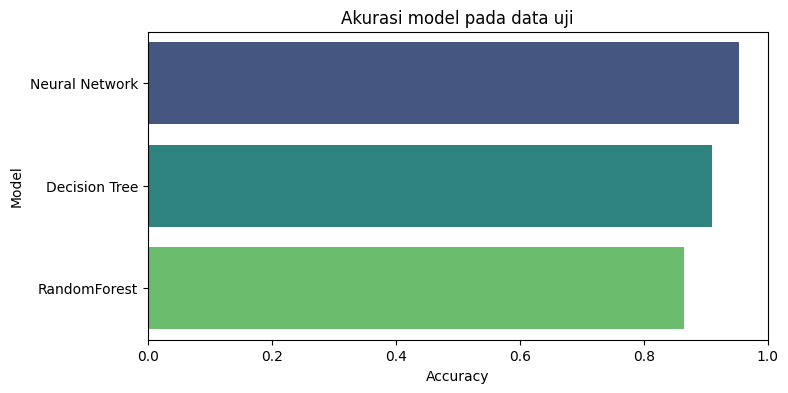

In [52]:
accuracy_data = models.loc['test'].sort_values(ascending=False).reset_index()
accuracy_data.columns = ['Model', 'Accuracy']

# Membuat plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Accuracy', y='Model', data=accuracy_data, palette='viridis')
plt.title('Akurasi model pada data uji')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

Dari hasil evaluasi model melalui grafik dan tabel diatas, dapat diketahui bahwa walaupun model yang dihasilkan oleh neural network menjadi yang paling terkecil pada data train, jika model tersebut diterapkan kepada data testing, model dengan neural network memiliki jarak akurasi yang tidak begitu jauh. Berbanding terbalik dengan Decision Tree dan Random Forest, walaupun pada pelatihan data train mereka mendapatkan akurasi yang hampir sempurna yaitu masing-masing 100% dan 99%, jika diterapkan kepada data testing akurasi yang mereka dapatkan sangat menurun jauh, hal ini disebabkan oleh karea model mengalami overfitting terhadap data train.